# Sección 4: Principios de Visualización de datos

## 4.1 Principios de visualización de datos parte 1

### Introducción a los principios de visualización de datos

Los principios se basan principalmente en investigaciones relacionadas a la manera en que los humanos detectan patrones y hacen comparaciones visuales.

Los enfoques preferidos son aquellos que mejor se adaptan a la forma en que nuestros cerebros procesan la información visual. Al escoger las herramientas de visualización, es importante tener en cuenta nuestro objetivo.

Para los científicos de datos es importante adaptar y optimizar los gráficos para la audiencia. Por ejemplo, un gráfico exploratorio hecho para nosotros será diferente a una tabla destinada a comunicar un hallazgo a una audiencia general.

### Como codificar datos utilizando señales visuales

Para ilustrar cómo se comparan algunas de estas estrategias, supongamos que queremos informar los resultados de dos encuestas hipotéticas, tomadas en 2000 y luego en 2015, con respecto a la preferencia de navegador.

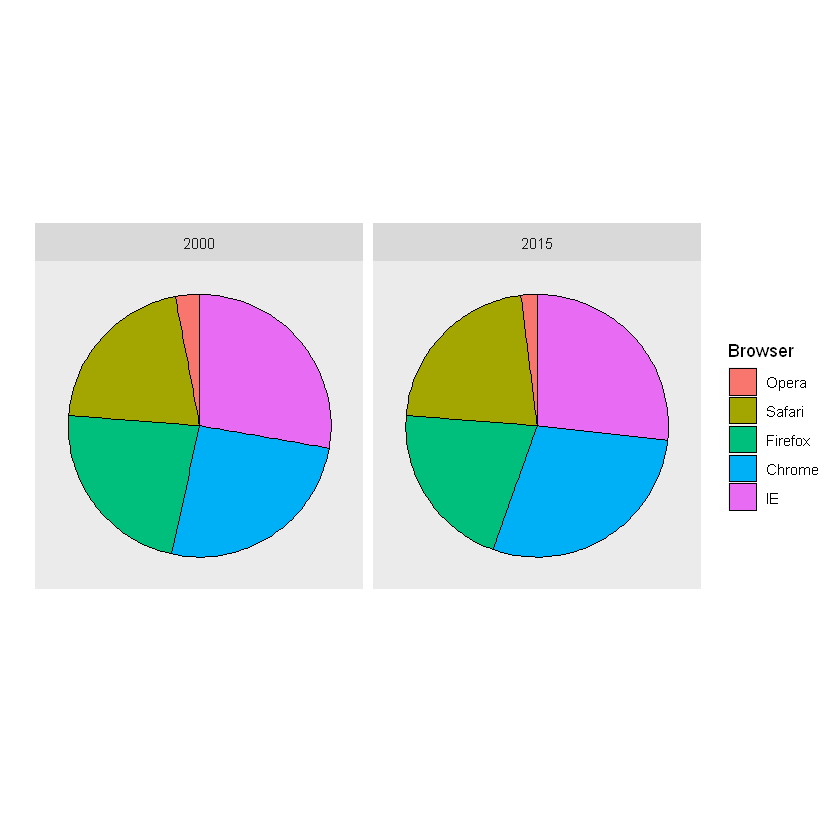

In [2]:
## Cargamos las librerías
library(tidyverse)
library(dslabs)
library(gridExtra)
library(ggthemes)

## Creamos el dataframe
browsers <- data.frame(Browser = rep(c("Opera","Safari","Firefox","IE","Chrome"),2),
                       Year = rep(c(2000, 2015), each = 5),
                       Percentage = c(3,21,23,28,26, 2,22,21,27,29)) %>%
  mutate(Browser = reorder(Browser, Percentage))
## Creamos la gráfica circular
p1 <- browsers %>% ggplot(aes(x = "", y = Percentage, fill = Browser)) +
  geom_bar(width = 1, stat = "identity", col = "black")  + coord_polar(theta = "y") +
  xlab("") + ylab("") +
  theme(axis.text=element_blank(), 
        axis.ticks = element_blank(), 
        panel.grid  = element_blank()) +
  facet_grid(.~Year)
p1

Aquí estamos representando cantidades con áreas y ángulos, ya que tanto el ángulo como el área de cada sección del gráfico son proporcionales a la cantidad que representa el sector.

Esto resulta ser una opción subóptima dado que, como lo demuestran los estudios de percepción, los humanos no son buenos para cuantificar ángulos con precisión y son aún peores cuando el área es la única señal visual disponible (como en los gráficos de anillo).

Los gráficos circulares son una forma muy mala de mostrar información. El ojo es bueno  juzgando medidas lineales y malo juzgando áreas relativas. Un diagrama de barras o de puntos es una forma preferible de mostrar este tipo de datos.

En este caso, simplemente mostrar los números no solo es más claro, sino que también ahorraría costos de impresión si imprimen una copia en papel:

In [13]:
browsers %>%
  spread(Year, Percentage) %>%
  knitr::kable()




|Browser | 2000| 2015|
|:-------|----:|----:|
|Opera   |    3|    2|
|Safari  |   21|   22|
|Firefox |   23|   21|
|Chrome  |   26|   29|
|IE      |   28|   27|

La forma preferida de gráficar estas cantidades es usar la longitud y la posición como señales visuales, ya que los humanos son mucho mejores juzgando medidas lineales.

El diagrama de barras usa este enfoque

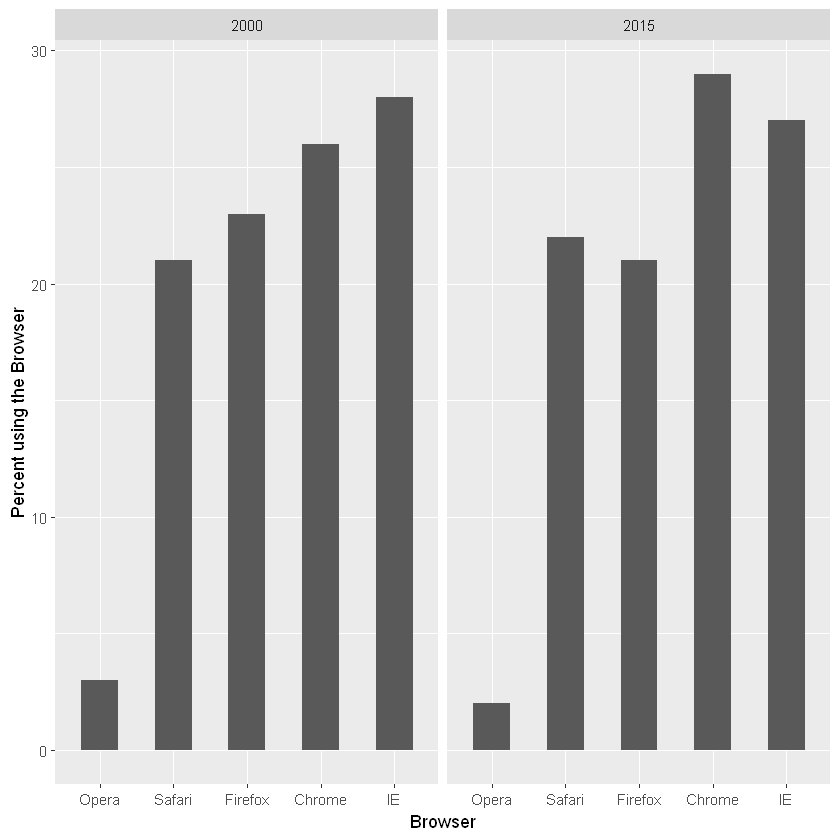

In [15]:
## Gráfica de barras
p2 <- browsers %>%
  ggplot(aes(Browser, Percentage)) + 
  geom_bar(stat = "identity", width=0.5) +
  ylab("Percent using the Browser") +
  facet_grid(.~Year)
p2

Observemos lo fácil que es ver las diferencias en el diagrama de barras.

Si por alguna razón es necesario hacer el gráfico circular, etiquetemos cada sección del círculo con su porcentaje respectivo para que la audiencia no tenga que inferirlos de los ángulos o del área:

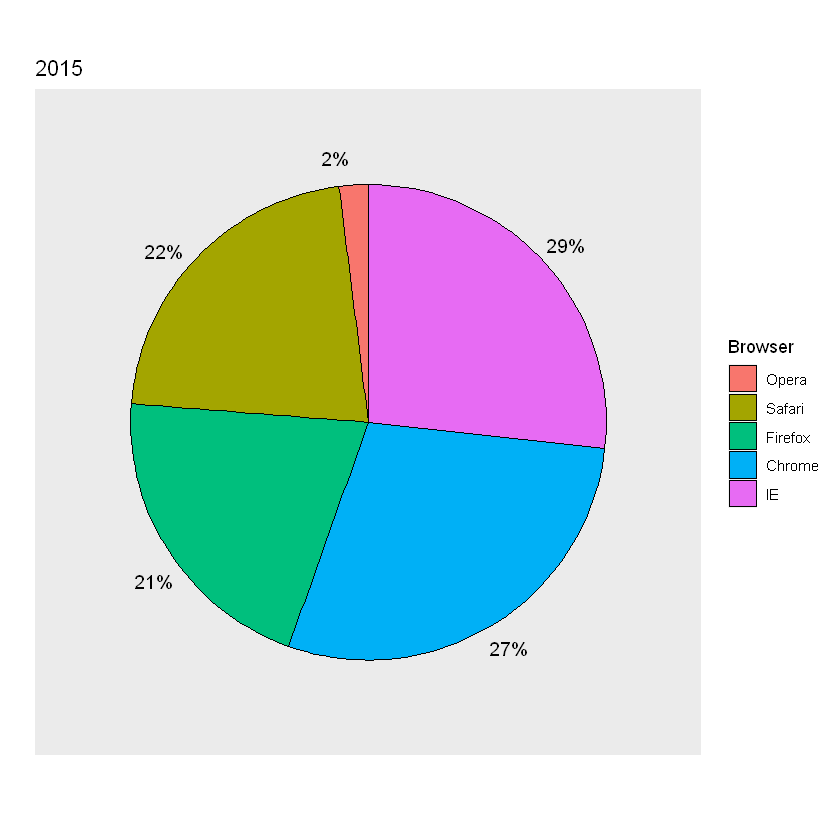

In [17]:
library(scales)
browsers <- filter(browsers, Year == 2015)
at <- with(browsers, 100 - cumsum(c(0,Percentage[-length(Percentage)])) - 0.5*Percentage)  
label <- percent(browsers$Percentage/100)
browsers |> ggplot(aes(x = "", y = Percentage, fill = Browser)) +
  geom_bar(width = 1, stat = "identity", col = "black")  + coord_polar(theta = "y") +
  xlab("") + ylab("") + ggtitle("2015") +
  theme(axis.text=element_blank(), 
        axis.ticks = element_blank(), 
        panel.grid  = element_blank()) +
  annotate(geom = "text", 
              x = 1.62, 
              y =  at, 
              label = label, size=4)

En general, cuando se muestran cantidades, se prefieren la posición y la longitud sobre los ángulos y/o el área.

### Cuándo incluir 0

Cuando se usan diagramas de barras, es erróneo no comenzar las barras en 0. Esto se debe a que, al usar un diagrama de barras, estamos implicando que la longitud es proporcional a las cantidades que se muestran. Al evitar 0, se pueden hacer diferencias relativamente pequeñas verse mucho más grandes de lo que realmente son.

Este acercamiento a menudo es utilizado por políticos o medios de comunicación que intentan exagerar la diferencia

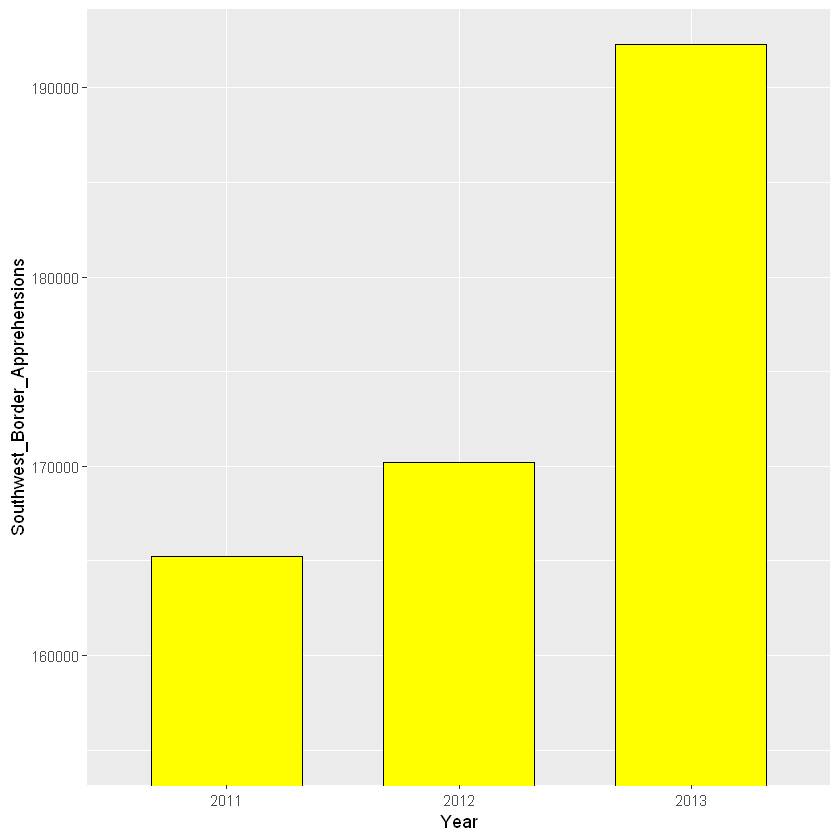

In [32]:
## Gráfico de barras que no comienza en 0
data.frame(Year = as.character(c(2011, 2012, 2013)),Southwest_Border_Apprehensions = c(165244,170223,192298)) |>
  ggplot(aes(Year, Southwest_Border_Apprehensions )) +
  geom_bar(stat = "identity", fill = "yellow", col = "black", width = 0.65) +
  coord_cartesian(ylim = c(155000, NA)) # Cambiamos el inicio y fin de los gráficos

En el gráfico anterior, las detenciones parecen haber casi triplicado cuando, de hecho, solo han aumentado aproximadamente un 16%.

Comenzar el gráfico en 0 ilustra esto claramente:

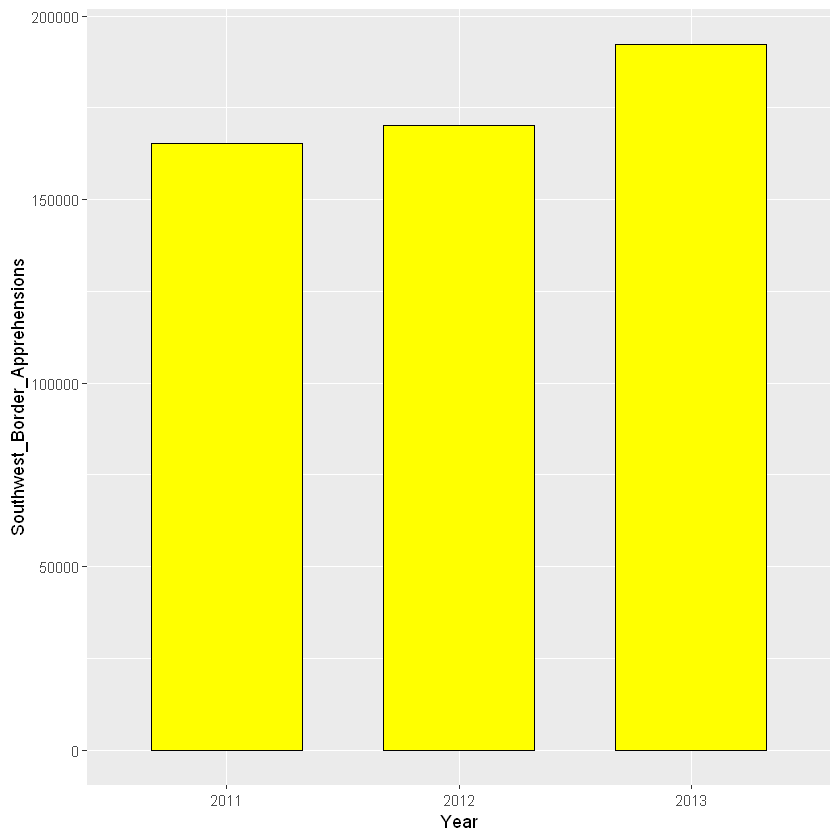

In [34]:
## Gráfico de barras que comienza en 0
data.frame(Year = as.character(c(2011, 2012, 2013)),Southwest_Border_Apprehensions = c(165244,170223,192298)) |>
  ggplot(aes(Year, Southwest_Border_Apprehensions )) +
  geom_bar(stat = "identity", fill = "yellow", col = "black", width = 0.65)

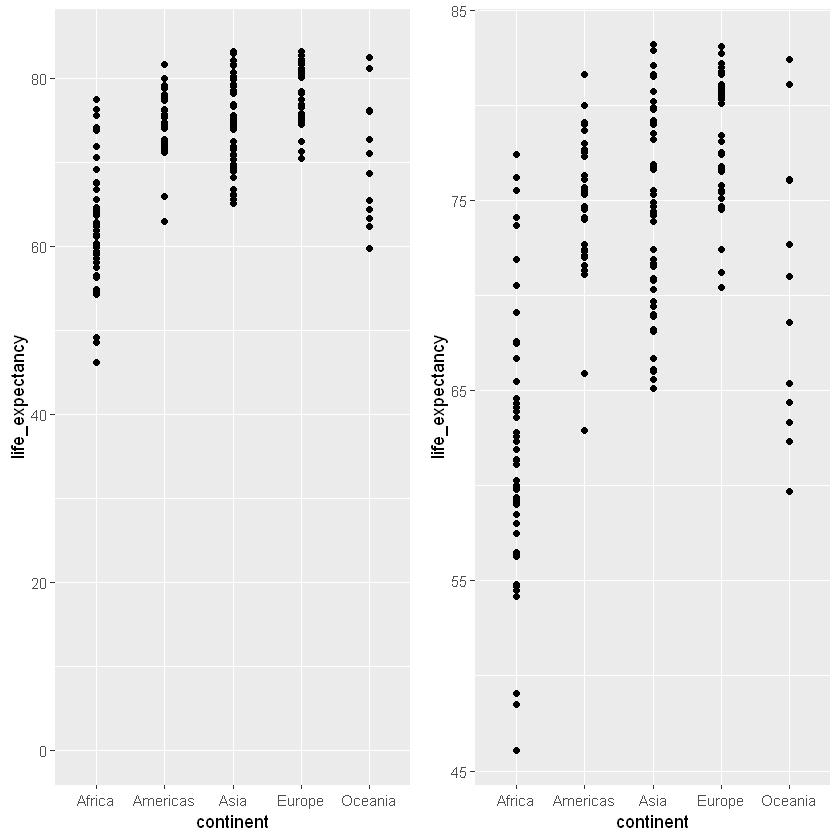

In [35]:
# Cargamos las librerías y los datos
library(dslabs)
data(gapminder)

p1 <- gapminder |> filter(year == 2012) |>
  ggplot(aes(continent, life_expectancy)) +
  geom_point()
p2 <- p1 +
  scale_y_continuous(limits = c(0, 84))
grid.arrange(p2, p1, ncol = 2)

### No distorsionar cantidades

Durante el discurso del Estado de la Unión de 2011 del Presidente Barack Obama, se utilizó un gráfico similar al siguiente para comparar el PIB de EE. UU. con el PIB de cuatro naciones competidoras:

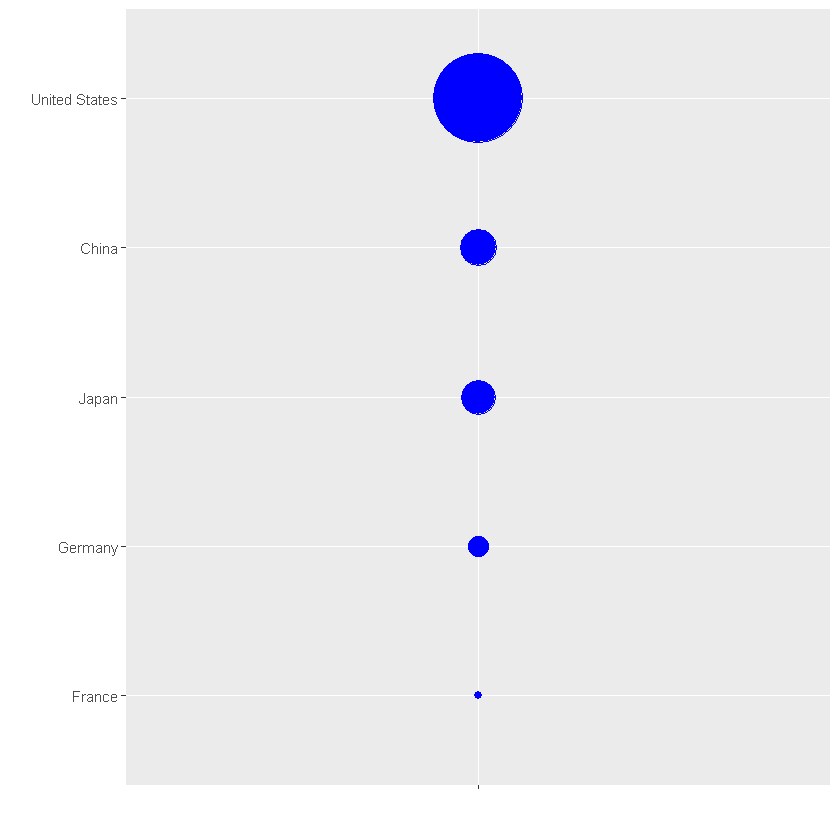

In [43]:
gdp <- c(14.6, 5.7, 5.3, 3.3, 2.5) # Datos de PIB
gdp_data <- data.frame(Country = rep(c("United States", "China", "Japan", "Germany", "France"),2), # Países
           y = "",
           GDP= c(gdp^2/min(gdp^2), gdp/min(gdp))) |> # Proporción de GDP
   mutate(Country = reorder(Country, GDP)) # Reordenación de países

## Gráfico utilizando el radio proporcional
gdp_data |> 
  ggplot(aes(Country, y, size = GDP)) + 
  geom_point(show.legend = FALSE, color = "blue") + 
  scale_size(range = c(2,25)) +
  coord_flip() + ylab("") + xlab("")

Si juzgamos por el área de los círculos, Estados Unidos parece tener una economía cinco veces más grande que la de China y más de 30 veces más grande que la de Francia. Sin embargo, si nos fijamos en los números actuales, vemos que este no es el caso.

La razón de esta distorsión es que el radio del círculo, en lugar del área, se hizo proporcional a la cantidad, lo que implica que la proporción entre las áreas es cuadrada.

Aquí hay una comparación de los círculos que obtenemos si hacemos que el valor sea proporcional al radio y al área:

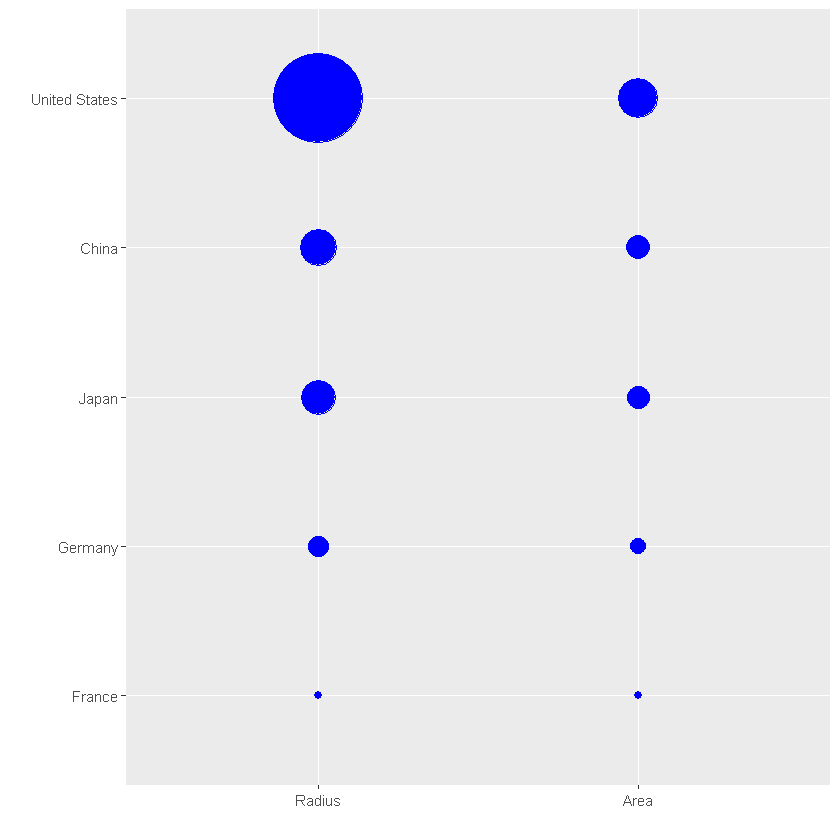

In [44]:
gdp_data <- data.frame(Country = rep(c("United States", "China", "Japan", "Germany", "France"),2),
           y = factor(rep(c("Radius","Area"),each=5), levels = c("Radius", "Area")),
           GDP= c(gdp^2/min(gdp^2), gdp/min(gdp))) |> # Proporción de GDP
   mutate(Country = reorder(Country, GDP)) # Reordenación de países

## Gráfico utilizando ambas proporciones
gdp_data |> 
  ggplot(aes(Country, y, size = GDP)) + 
  geom_point(show.legend = FALSE, color = "blue") + 
  scale_size(range = c(2,25)) +
  coord_flip() + ylab("") + xlab("")

No sorprende entonces que por defecto `ggplot2` use el área en lugar del radio. Sin embargo, en este caso, realmente no deberíamos usar el área, ya que podemos usar la posición y la longitud:

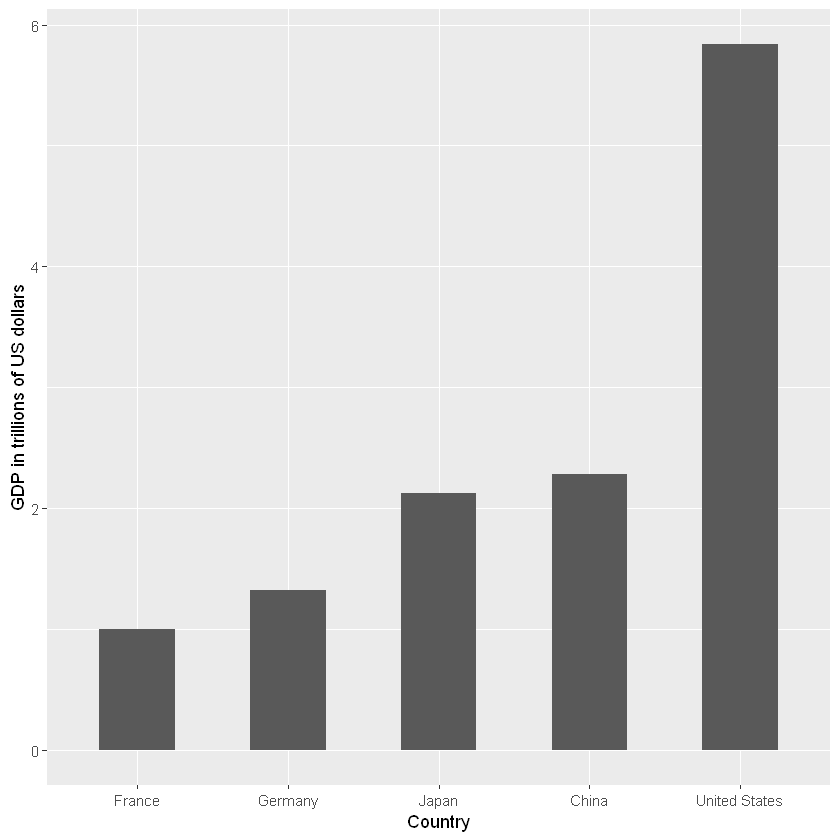

In [45]:
## Gráfico de barras
gdp_data |> 
  filter(y == "Area") |>
  ggplot(aes(Country, GDP)) + 
  geom_bar(stat = "identity", width = 0.5) + 
  ylab("GDP in trillions of US dollars")

### Ordenar categorías por un valor significativo

Cuando uno de los ejes se usa para mostrar categorías, como se hace en los diagramas de barras, el comportamiento por defecto de ggplot2 es ordenar las categorías alfabéticamente.

Raras veces queremos usar el orden alfabético. En cambio, debemos ordenar por una cantidad significativa. Para lograr hacer esto podemos utilizar la función `reorder`

Para apreciar cómo el orden correcto puede ayudar a transmitir un mensaje, supongan que queremos crear un gráfico para comparar la tasa de homicidios en todos los estados de EE.UU. 

Estamos particularmente interesados en los estados más peligrosos y los más seguros.

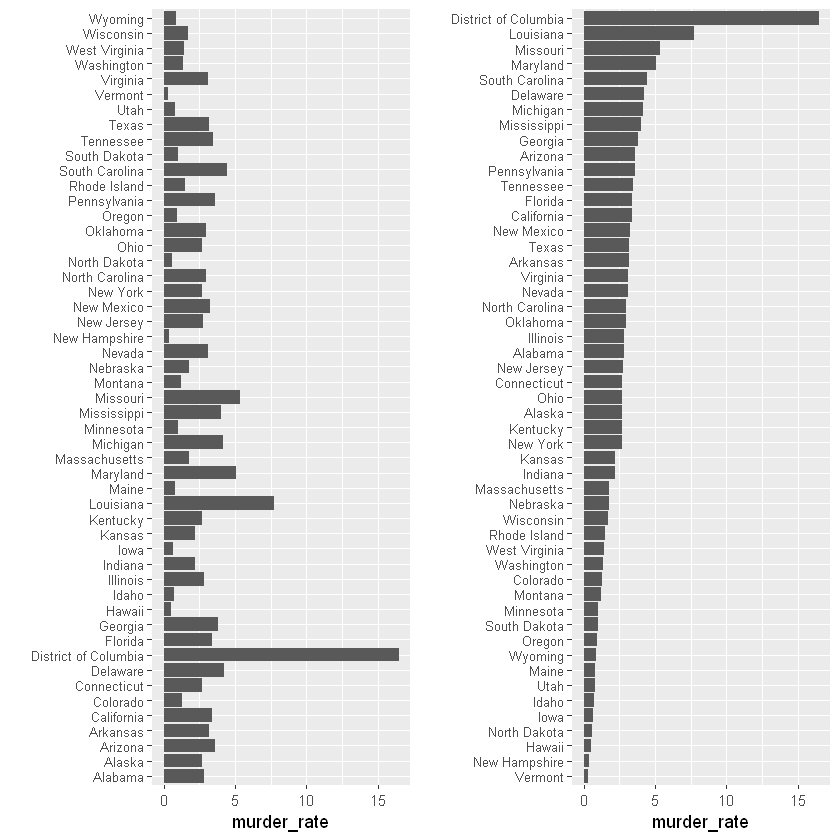

In [46]:
## Cargamos los datos
data(murders)

## Gráfico con el orden por defecto
p1 <- murders |> mutate(murder_rate = total / population * 100000) |>
  ggplot(aes(state, murder_rate)) +
  geom_bar(stat="identity") +
  coord_flip() +
  theme(axis.text.y = element_text(size = 8))  +
  xlab("")

## Gráfico reordenado
p2 <- murders |> mutate(murder_rate = total / population * 100000) |>
  mutate(state = reorder(state, murder_rate)) |> # reordenamos por cantidad
  ggplot(aes(state, murder_rate)) +
  geom_bar(stat="identity") +
  coord_flip() +
  theme(axis.text.y = element_text(size = 8))  +
  xlab("")

## Juntamos los gráficos
grid.arrange(p1, p2, ncol = 2)

Ordenar nos facilita el trabajo de observar el comportamiento que buscamos

> La función `reorder` también nos permite reordenar grupos.

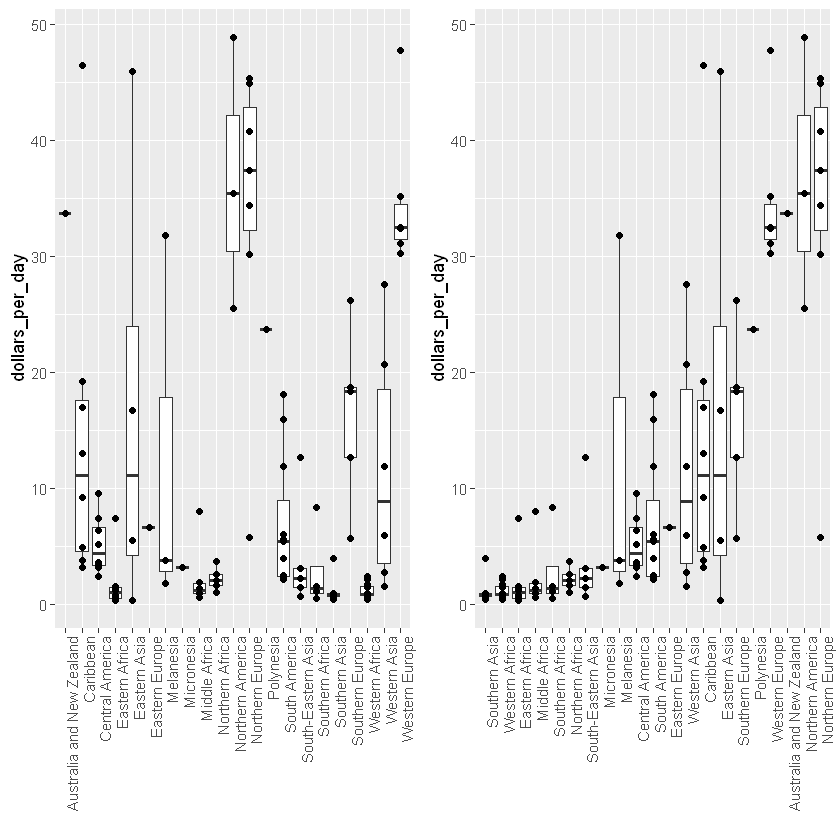

In [47]:
past_year <- 1970

## Gráfico con grupos ordenados por defecto
p1 <- gapminder |> 
  mutate(dollars_per_day = gdp/population/365) |>
  filter(year == past_year & !is.na(gdp)) |>
  ggplot(aes(region, dollars_per_day)) +
  geom_boxplot() +
  geom_point() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  xlab("")

## Gráfico con grupos reordenados
p2 <- gapminder |> 
  mutate(dollars_per_day = gdp/population/365) |>
  filter(year == past_year & !is.na(gdp)) |>
  mutate(region = reorder(region, dollars_per_day, FUN = median)) |> # reordenamos por mediana
  ggplot(aes(region, dollars_per_day)) +
  geom_boxplot() +
  geom_point() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  xlab("")

## Juntamos los gráficos
grid.arrange(p1, p2, nrow=1)

## 4.2 Principios de visualización de datos parte 2

### Mostrar datos

Nos hemos enfocado en mostrar cantidades únicas en todas las categorías. Ahora cambiamos nuestra atención a la visualización de datos con un enfoque en la comparación de grupos.

Esta vez supongamos que estamos interesados en la diferencia de alturas entre hombres y mujeres. Un gráfico comúnmente utilizado para comparaciones entre grupos y popularizado por software como Microsoft Excel, es el **dynamite plot**, que muestra el promedio y los errores estándar. El gráfico se ve así:

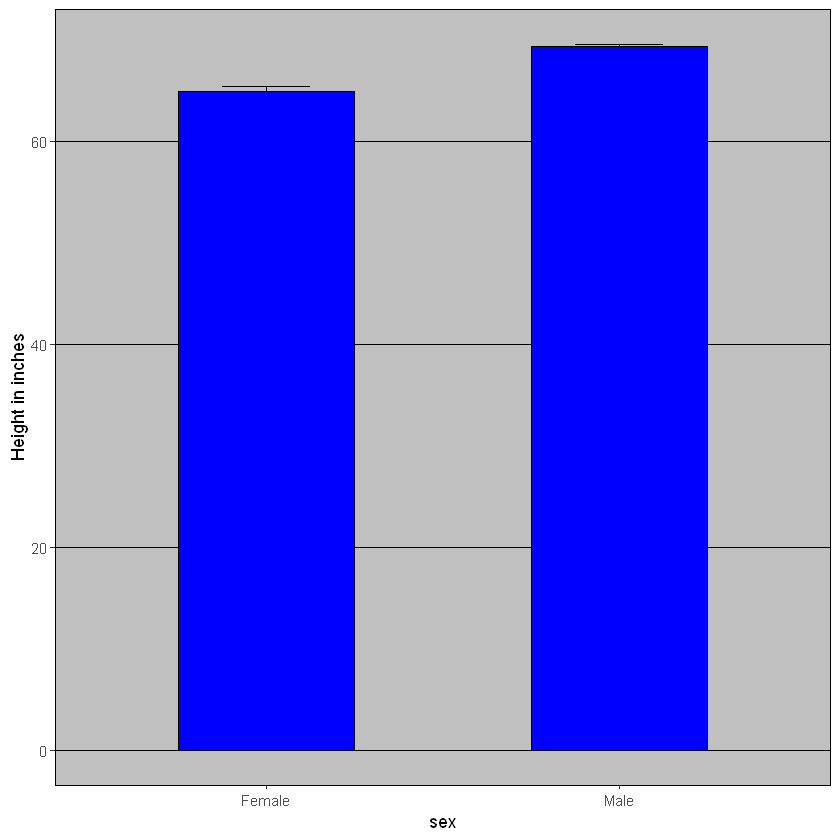

In [48]:
## cargamos los datos
data(heights)

## Graficamos los datos
p1 <- heights |> 
  group_by(sex) |> 
  summarize(average = mean(height), se=sd(height)/sqrt(n())) |>
  ggplot(aes(sex, average)) + 
  theme_excel() + 
  geom_errorbar(aes(ymin = average - 2*se, ymax = average+2*se), width = 0.25) +
  geom_bar(stat = "identity", width=0.5, fill = "blue", color = "black") +
  ylab("Height in inches")
p1

El promedio de cada grupo está representado por la parte superior de cada barra y las antenas se extienden desde el promedio al promedio más dos errores estándar. Si todo lo que tenemos es este gráfico, tendremos poca información sobre qué esperar si se encuentra con un grupo de hombres y mujeres.

Las barras van a 0: ¿esto significa que hay humanos pequeños que miden menos de un pie? ¿Todos los hombres son más altos que las mujeres más altas? ¿Hay una rango de alturas? no podríamos  responder a estas preguntas ya que casi no hemos recibido información sobre la distribución de altura.

Esto nos lleva a nuestro primer principio: mostrar los datos.

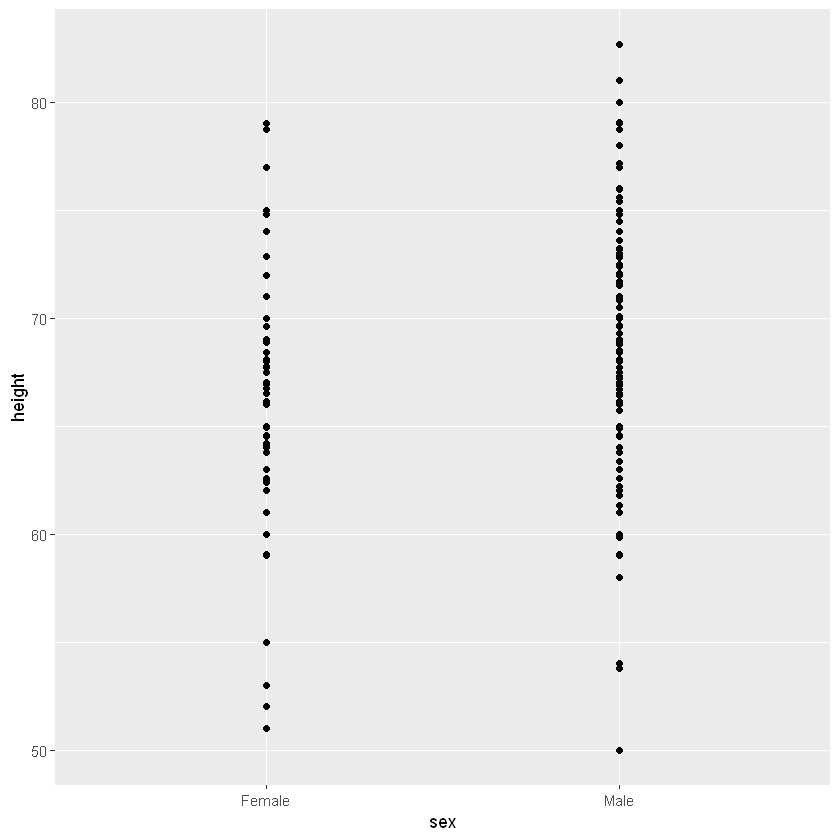

In [49]:
heights |>
    ggplot(aes(sex, height)) +
    geom_point()

El gráfico anterior nos da una idea del rango de los datos. Sin embargo, este gráfico también tiene limitaciones.

- no podemos ver todos los puntos de cada grupo
- Muchos puntos están graficados uno por encima de otro

Este gráfico podemos mejorarlo de dos formas.

- Agregar `jitter`: añade un pequeño desplazamiento a cada punto.
- Agregar `alpha`: Hace que los puntos sean algo transparentes.

En este caso, agregar `jitter` horizontal no cambia la interpretación, ya que las alturas de los puntos no cambian, pero minimizamos el número de puntos que se superponen y, por lo tanto, tenemos una mejor idea visual de cómo se distribuyen los datos.

Entre más puntos se superponen, más oscuro será el gráfico, que también nos ayuda tener una idea de cómo se distribuyen los puntos.

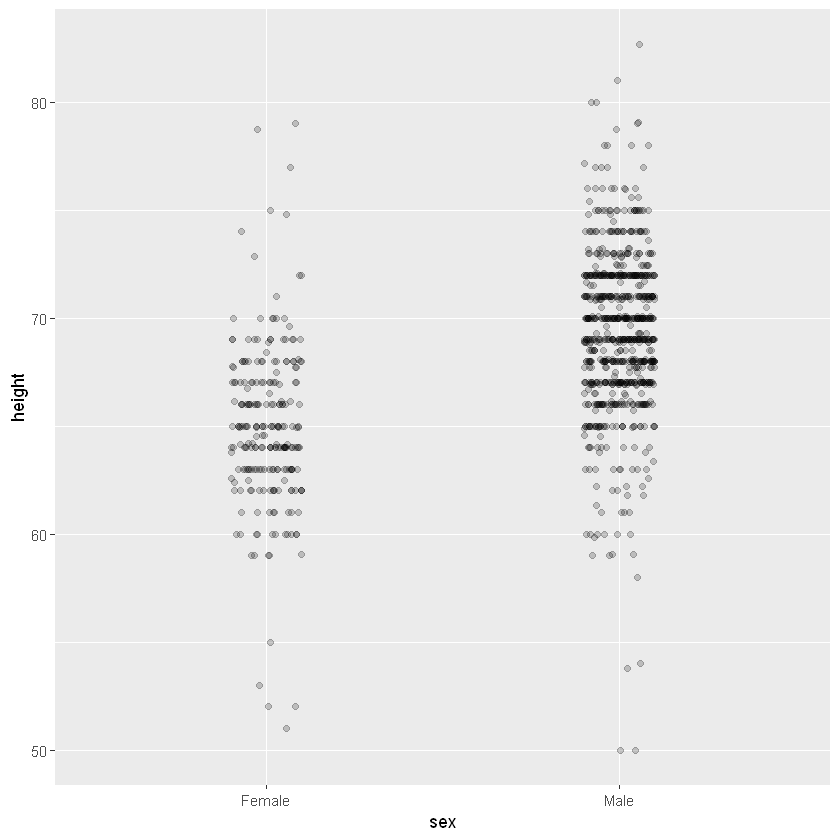

In [50]:
heights |>
    ggplot(aes(sex, height)) +
    geom_jitter(width = 0.1, alpha = 0.2)

Ahora comenzamos a sentir que, en promedio, los hombres son más altos que las mujeres.

También observamos bandas horizontales oscuras de puntos, que demuestra que muchos estudiantes indican valores que se redondean al entero más cercano.

### Facilite las comparaciones: use ejes comunes

Como hay tantos puntos, es más efectivo mostrar distribuciones que puntos individuales.

Por lo tanto, mostramos histogramas para cada grupo:

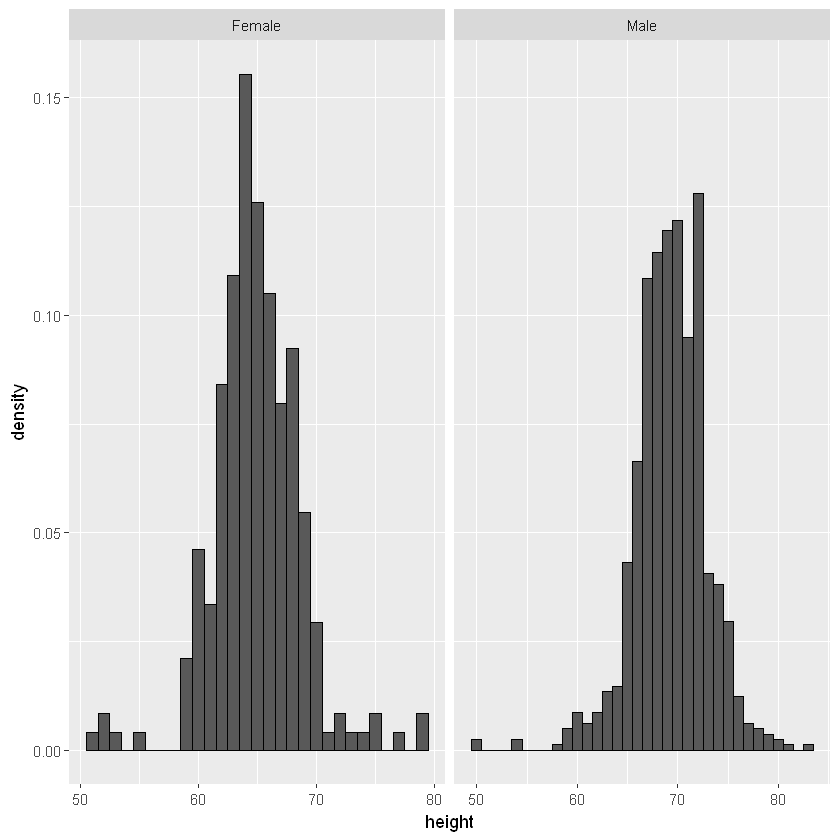

In [52]:
## Comparación de histogramas
heights |> 
  ggplot(aes(height, after_stat(density))) +
  geom_histogram(binwidth = 1, color="black") +
  facet_grid(.~sex, scales = "free_x")

Mirando el gráfico arriba, no es inmediatamente obvio que los hombres son, en promedio, más altos que las mujeres. Tenemos que mirar cuidadosamente para notar que el eje-x tiene un rango más alto de valores en el histograma masculino.

Un principio importante aquí es **mantener los ejes iguales** cuando se comparan datos en dos gráficos.

A continuación, vemos cómo la comparación se vuelve más fácil

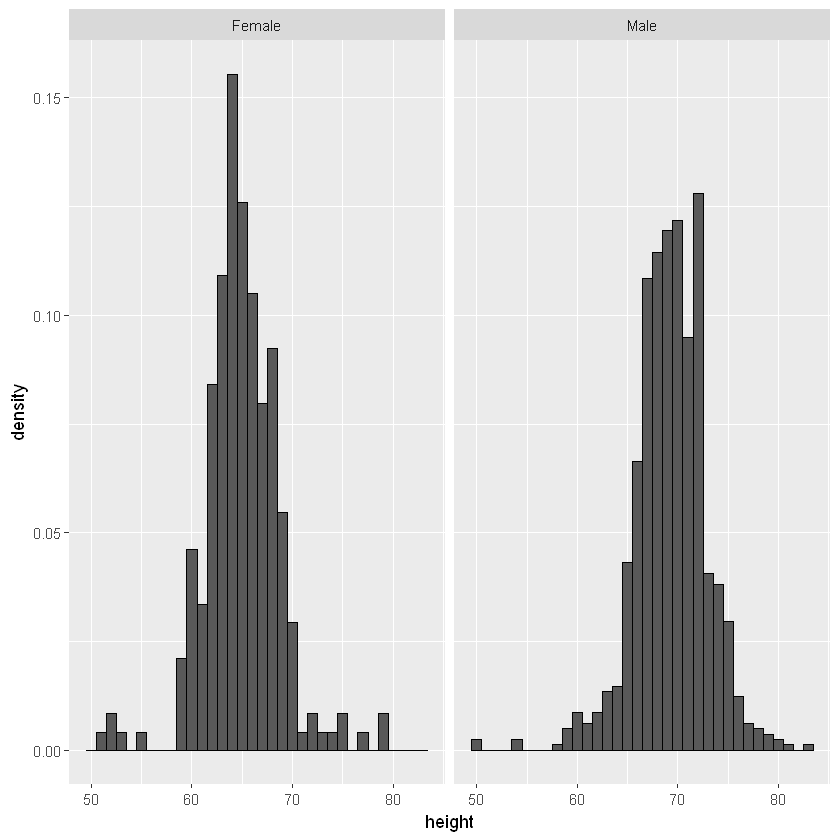

In [53]:
heights |> 
  ggplot(aes(height, after_stat(density))) +
  geom_histogram(binwidth = 1, color="black") +
  facet_grid(. ~ sex)

En estos histogramas, la señal visual relacionada con las disminuciones o los aumentos de altura son los cambios hacia la izquierda o hacia la derecha, respectivamente: los cambios horizontales.

Alinear los gráficos verticalmente nos ayuda a ver este cambio cuando los ejes
son fijos:

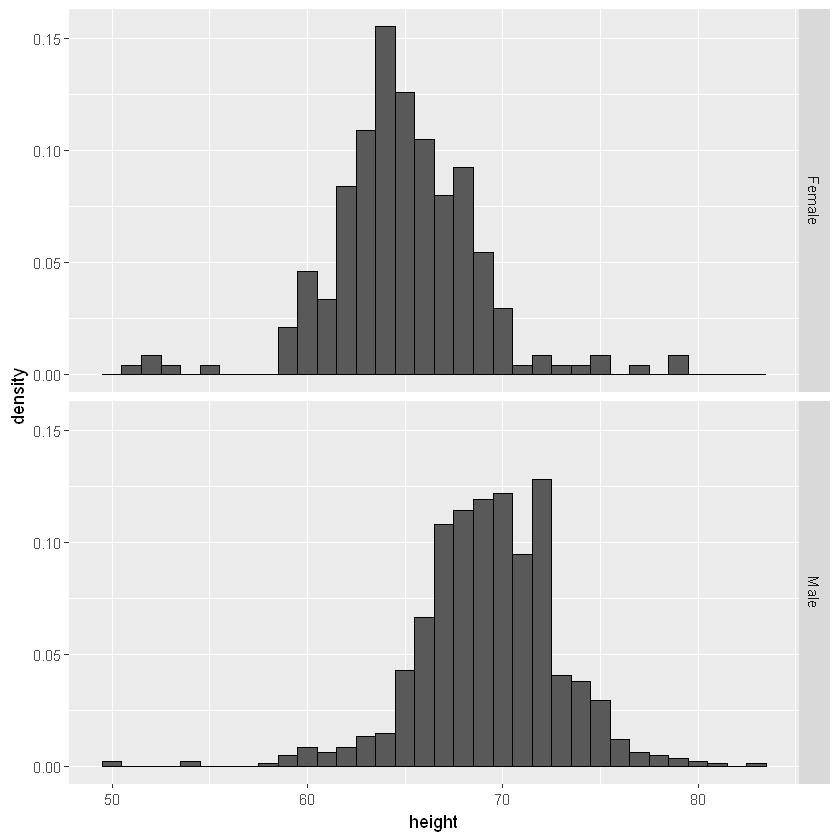

In [54]:
heights |> 
  ggplot(aes(height, after_stat(density))) +
  geom_histogram(binwidth = 1, color="black") +
  facet_grid(sex ~ .)

Si queremos obtener el resumen compacto que ofrecen los diagramas de caja, tenemos que alinearlos horizontalmente ya que, por defecto, los diagramas de caja se mueven hacia arriba y hacia abajo según los cambios de altura.

Siguiendo nuestro principio de “mostrar los datos”, superponemos todos los puntos de datos:

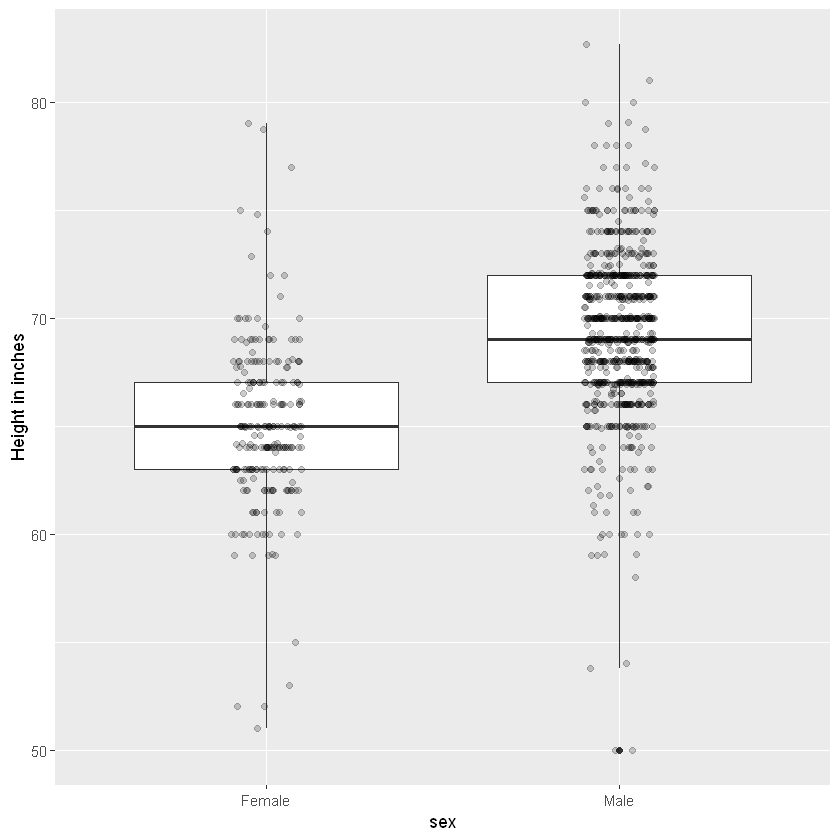

In [55]:
heights |>
    ggplot(aes(sex, height)) +
    geom_boxplot(coef=3) +
    geom_jitter(width = 0.1, alpha = 0.2) +
    ylab("Height in inches")

Contrastando los tres gráficos notamos que son mucho mas útiles estos últimos 2.

Los diagramas de barras son útiles para mostrar un número, pero no son muy útiles cuando queremos describir distribuciones.

### Considerar transformaciones

Hemos motivado el uso de la transformación logarítmica en los casos en que los cambios son multiplicativos.

La combinación de un diagrama de barras elegido incorrectamente y no usar una transformación logarítmica cuando sea necesario puede ser particularmente distorsionante.

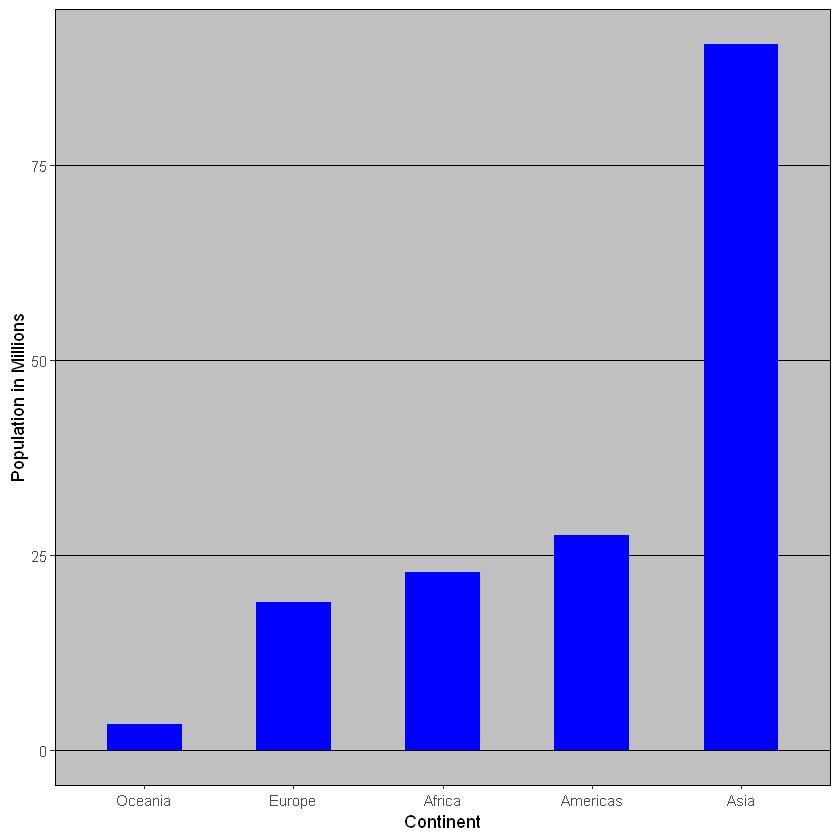

In [56]:
data(gapminder)

## Gráfica de barras de la población
p1 <- gapminder |> 
  filter(year == 2015) |>
  group_by(continent) |> 
  summarize(population = mean(population)) |>
  mutate(continent = reorder(continent, population)) |>
  ggplot(aes(continent, population/10^6)) + 
  geom_bar(stat = "identity", width=0.5, fill="blue") +
  theme_excel() + 
  ylab("Population in Millions") +
  xlab("Continent")
p1

Mirando el gráfico anterior, uno concluiría que los países de Asia son mucho más poblados que los de otros continentes. 

Siguiendo el principio de “mostrar los datos”, notamos rápidamente que esto se debe a dos países muy grandes, que suponemos son India y China:

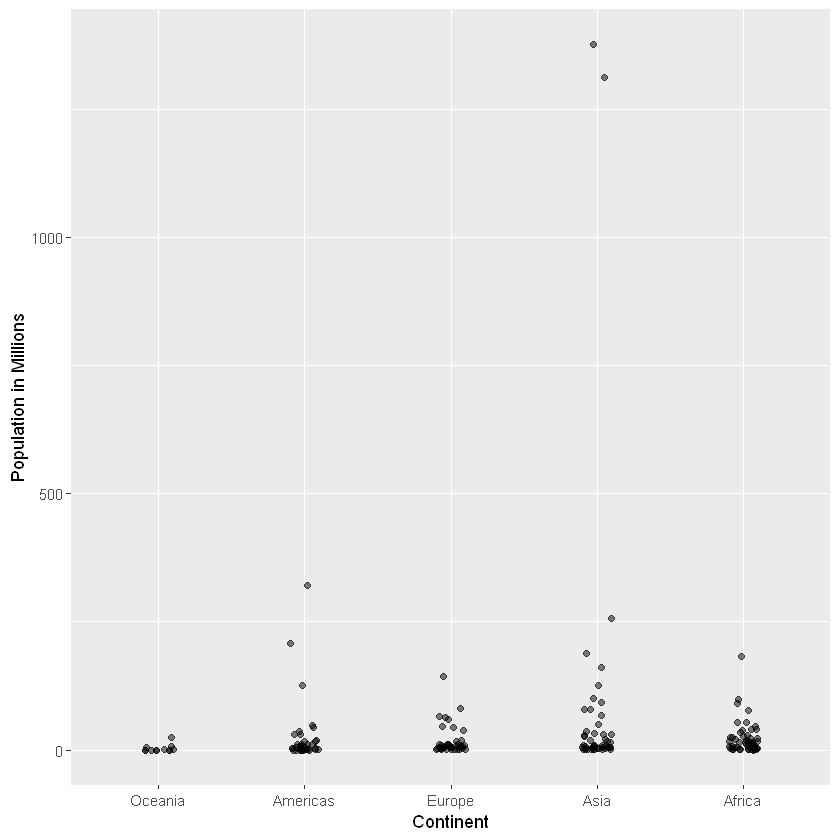

In [57]:
p2 <- gapminder |> filter(year == 2015) |> 
  mutate(continent = reorder(continent, population, median)) |>
  ggplot(aes(continent, population/10^6)) + 
  ylab("Population in Millions") +
  xlab("Continent")
p2 +  geom_jitter(width = .1, alpha = .5)

El uso de una transformación logarítmica aquí produce un gráfico mucho más informativo.

Comparamos el diagrama de barras original con un diagrama de caja usando la transformación de escala logarítmica para el eje-y:

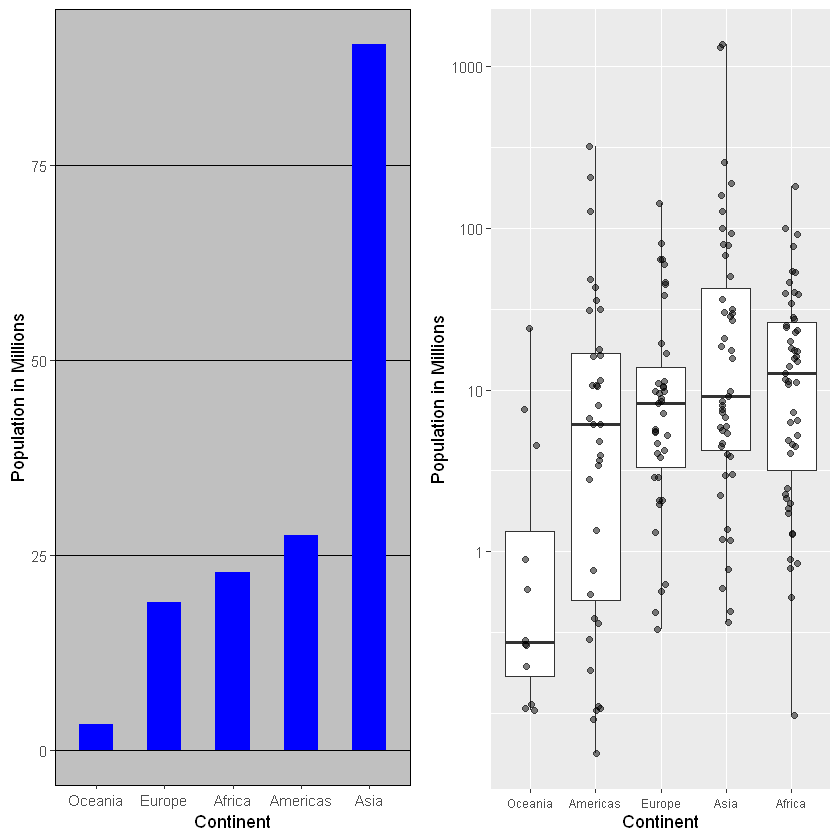

In [58]:
p2 <- p2 + geom_boxplot(coef=3) + 
  geom_jitter(width = .1, alpha = .5) + 
  scale_y_log10(breaks = c(1,10,100,1000)) +
  theme(axis.text.x = element_text(size = 7)) 
grid.arrange(p1, p2, ncol = 2)

Con el nuevo gráfico, nos damos cuenta de que los países de África tienen una población mediana mayor que los de Asia.

> Otras transformaciones que deben considerar son la transformación logística (`logit`), que es útil para ver mejor los cambios en las probabilidades, y la transformación de la raíz cuadrada (`sqrt`), que es útil para conteos.

### Facilite las comparaciones: las señales visuales comparadas deben ser adyacentes

Para cada continente, comparemos los ingresos en 1970 versus 2010.

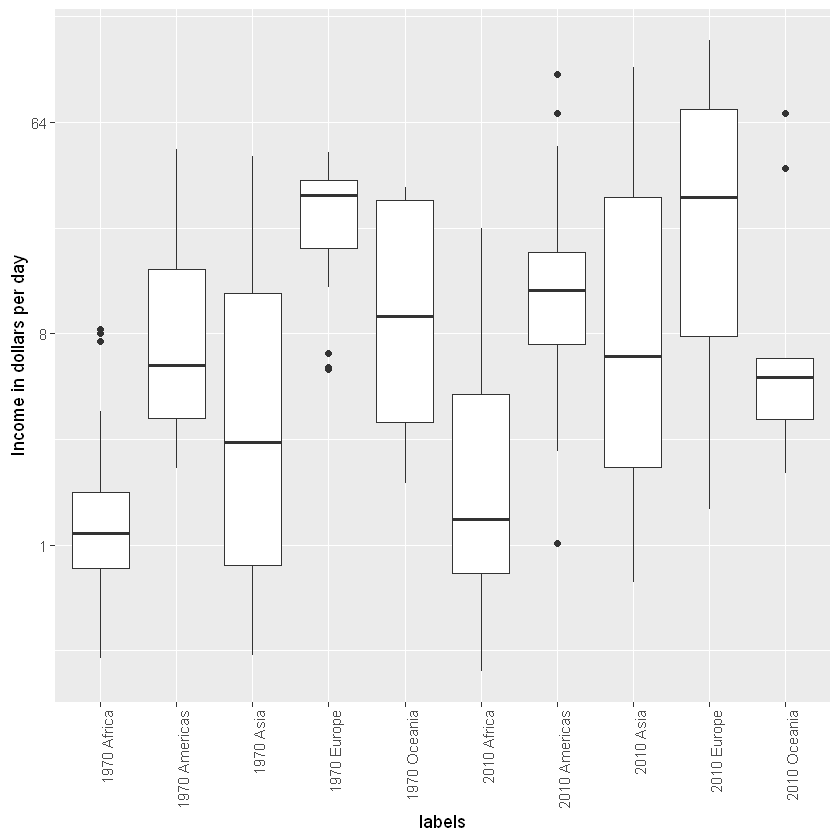

In [59]:
gapminder |> 
  filter(year %in% c(1970, 2010) & !is.na(gdp)) |>
  mutate(dollars_per_day = gdp/population/365) |>
  mutate(labels = paste(year, continent)) |>
  ggplot(aes(labels, dollars_per_day)) +
  geom_boxplot() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_y_continuous(trans = "log2") + 
  ylab("Income in dollars per day")

El comportamiento por defecto de `ggplot2` es ordenar las etiquetas alfabéticamente para que las etiquetas con 1970 aparezcan antes que las etiquetas con 2010. Esto dificulta las comparaciones porque la distribución de un continente en 1970 está visualmente lejos de su distribución en 2010.

Es mucho más fácil hacer la comparación entre 1970 y 2010 para cada continente cuando los diagramas de caja para ese continente están uno al lado del otro:

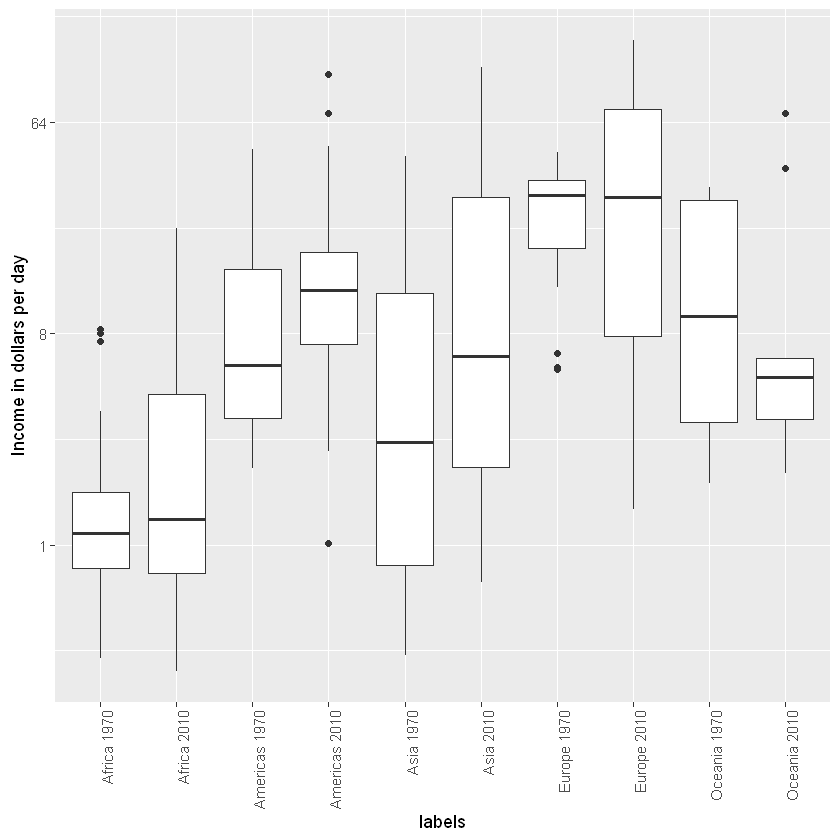

In [60]:
gapminder |> 
  filter(year %in% c(1970, 2010) & !is.na(gdp)) |>
  mutate(dollars_per_day = gdp/population/365) |>
  mutate(labels = paste(continent, year)) |>
  ggplot(aes(labels, dollars_per_day)) +
  geom_boxplot() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_y_continuous(trans = "log2") + 
  ylab("Income in dollars per day")

La comparación se hace aún más fácil si usamos color para denotar las dos cosas que queremos comparar:

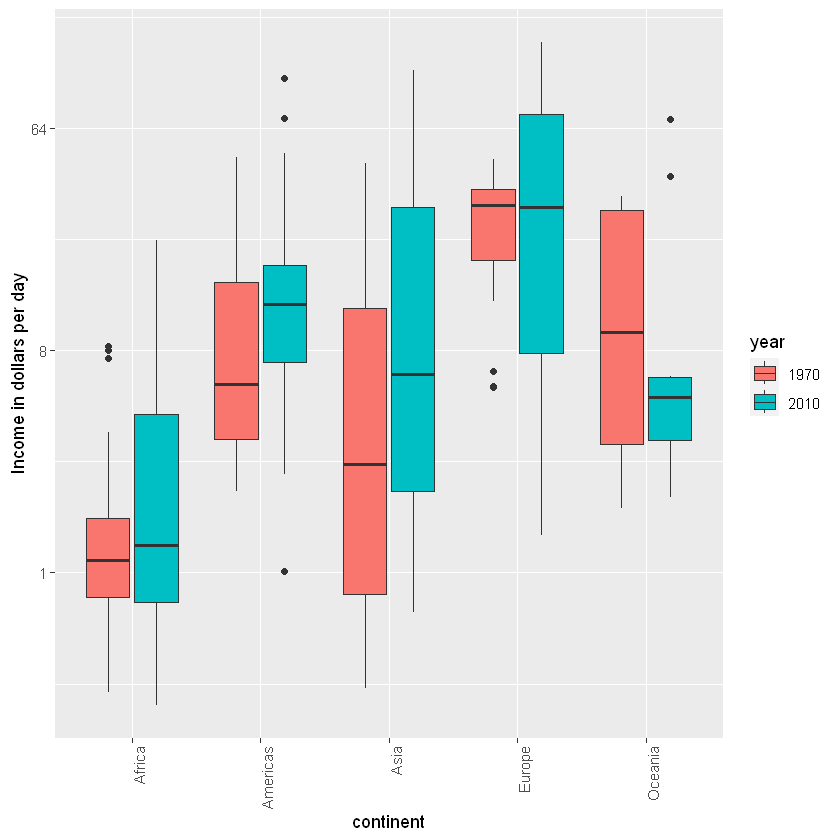

In [61]:
gapminder |> 
  filter(year %in% c(1970, 2010) & !is.na(gdp)) |>
  mutate(dollars_per_day = gdp/population/365, year = factor(year)) |>
  ggplot(aes(continent, dollars_per_day, fill = year)) +
  geom_boxplot() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  scale_y_continuous(trans = "log2") + 
  ylab("Income in dollars per day")

En caso de ser necesario, `ggplot2` hace fácil cambiar la paleta de colores utilizada en los gráficos

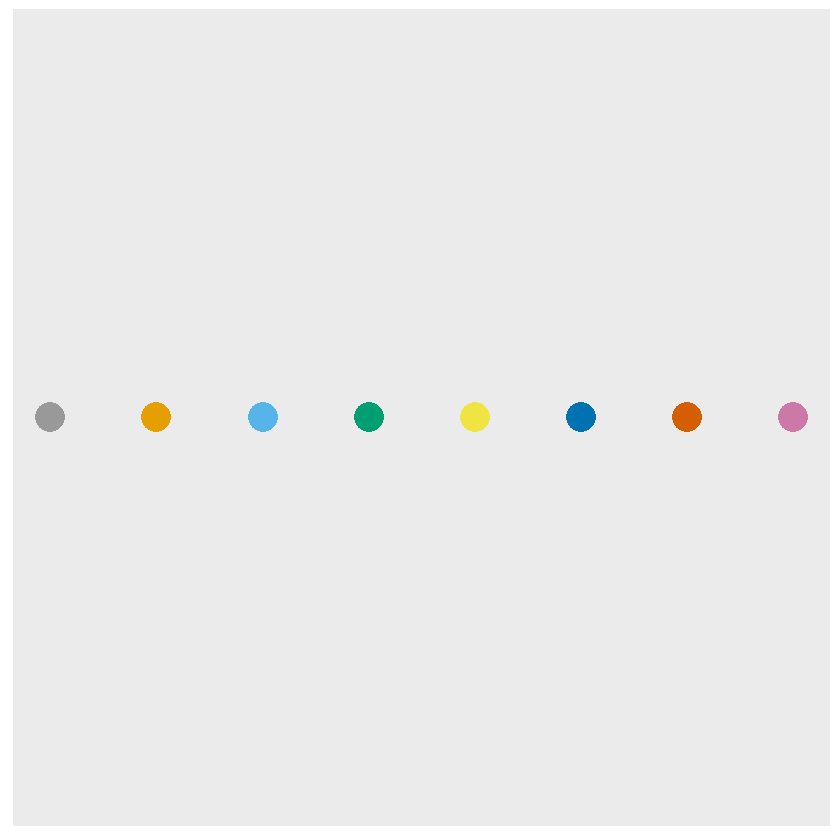

In [62]:
## Definimos la paleta de colores
color_blind_friendly_cols <- 
  c("#999999", "#E69F00", "#56B4E9", "#009E73", 
    "#F0E442", "#0072B2", "#D55E00", "#CC79A7")

p1 <- data.frame(x=1:8, y=rep(1,8), col = as.character(1:8)) |> 
  ggplot(aes(x, y, color = col)) + 
  geom_point(size=8, show.legend = FALSE) +
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank())

## Aplicamos la paleta de colores definida
p1 + scale_color_manual(values=color_blind_friendly_cols)

## Evaluación 4.2: Principios de visualización de datos parte 2

### Ejercicio 1: personalización de gráficos - mira y aprende

Para hacer el gráfico de la derecha en el ejercicio del último conjunto de evaluaciones, tuvimos que reordenar los niveles de las variables de los estados.

Redefina el objeto `state` para que los niveles se reordenen. Imprima el nuevo objeto `state` y sus niveles para que pueda ver que el vector ahora está reordenado por niveles.

In [63]:
source("./Scripts/4-2/Ejercicio1.r", print.eval = TRUE)

 [1] Alabama              Alaska               Arizona             
 [4] Arkansas             California           Colorado            
 [7] Connecticut          Delaware             District Of Columbia
[10] Florida              Georgia              Hawaii              
[13] Idaho                Illinois             Indiana             
[16] Iowa                 Kansas               Kentucky            
[19] Louisiana            Maine                Maryland            
[22] Massachusetts        Michigan             Minnesota           
[25] Mississippi          Missouri             Montana             
[28] Nebraska             Nevada               New Hampshire       
[31] New Jersey           New Mexico           New York            
[34] North Carolina       North Dakota         Ohio                
[37] Oklahoma             Oregon               Pennsylvania        
[40] Rhode Island         South Carolina       South Dakota        
[43] Tennessee            Texas                U

### Ejercicio 2: Personalización de gráficos - redefinición

Ahora edite el código de arriba para redefinir `dat` para que los niveles de la variable `state` se reordenen por la variable `rate`. Entonces haga un diagrama de barras usando el código anterior, pero para este nuevo `dat`.

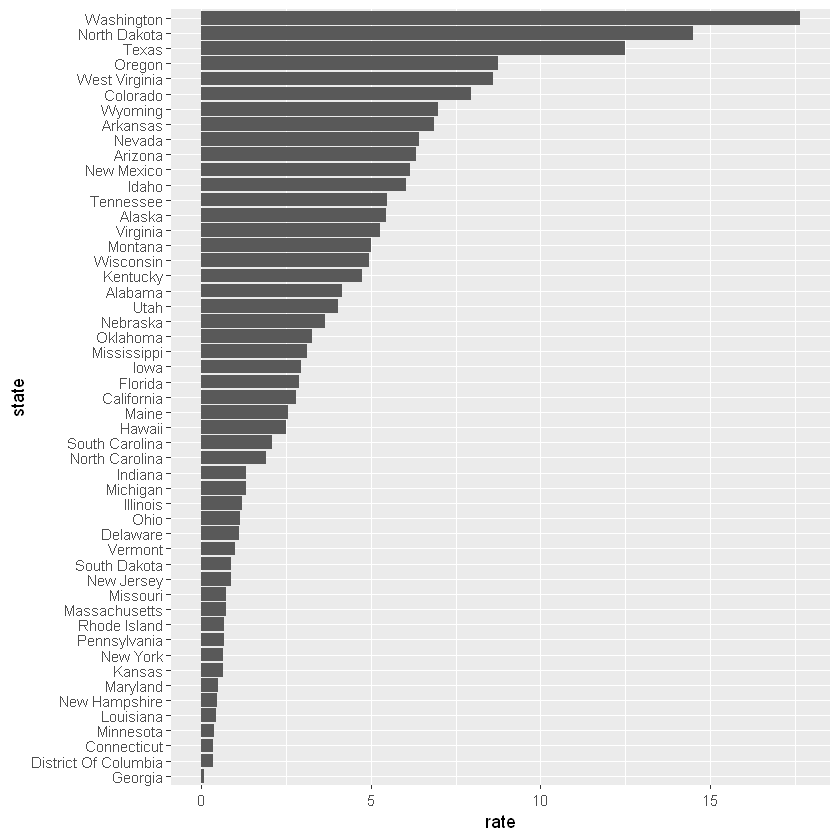

In [2]:
source("./Scripts/4-2/Ejercicio2.r", print.eval = TRUE)

### Ejercicio 3: Hacer un diagrama de caja

Para investigar más a fondo si mudarse a la región occidental es una buena decisión, hagamos un diagrama de caja de las tasas de homicidios por región, que muestre todos los puntos.

Ordene las regiones por su tasa de asesinatos promedio usando `mutate` y `reorder`.
Haz un diagrama de caja de las tasas de homicidios por región.

Muestra todos los puntos en el diagrama de caja.

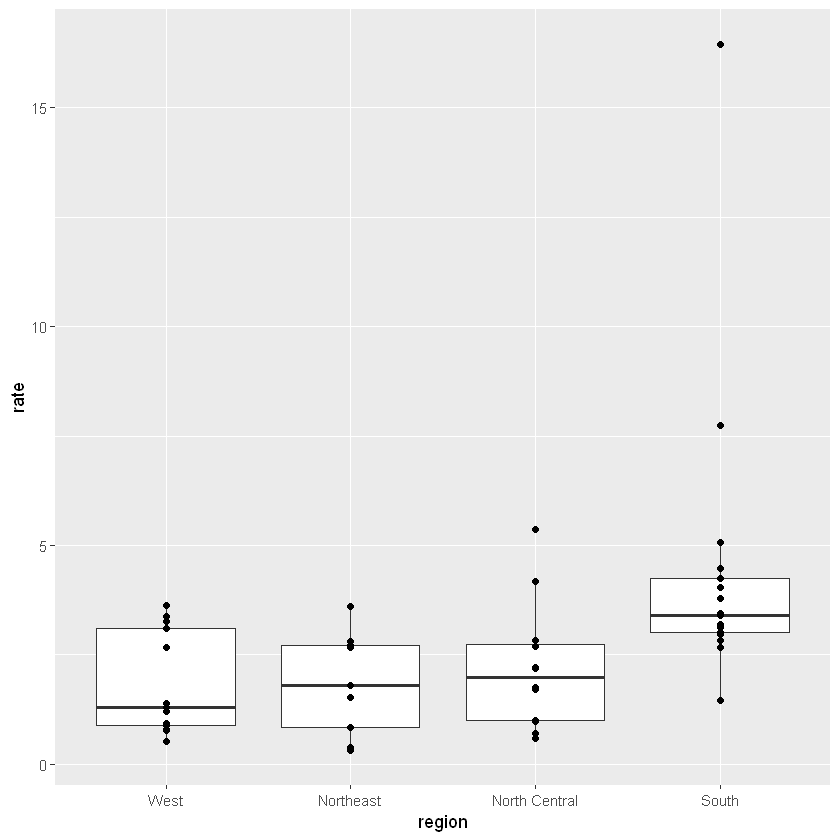

In [3]:
source("./Scripts/4-2/Ejercicio3.r", print.eval = TRUE)

## 4.3 Principios de visualización de datos parte 3